In [1]:
import numpy as np
import pandas as pd 

dataset = pd.read_csv('../dataset/dados_pregao_lwsa3.csv')
colunas = ['data_pregao', 'preco_ultimo_negocio']
data = dataset[colunas]
data['data_pregao'] = pd.to_datetime(data['data_pregao'])
data.set_index('data_pregao', inplace=True)

train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

train_data_values = train_data['preco_ultimo_negocio'].values
test_data_values = train_data['preco_ultimo_negocio'].values

data

C:\Users\suporte\AppData\Local\Temp\ipykernel_8496\1575412354.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['data_pregao'] = pd.to_datetime(data['data_pregao'])


,preco_ultimo_negocio
data_pregao,
2020-02-06,20.60
2020-02-07,20.30
2020-02-10,20.20
2020-02-11,20.20
2020-02-12,21.92
...,...
2024-10-01,4.16
2024-10-02,4.19
2024-10-03,4.07


In [2]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10
X_train, y_train = create_sequences(train_data_values, sequence_length)
X_test, y_test = create_sequences(train_data_values, sequence_length)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [3]:
from keras.models import Sequential, save_model, load_model
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

predictions = model.predict(X_test)

mse = np.mean((predictions - y_test) ** 2)
print("Mean Squared Error:", mse)

Epoch 1/100


c:\Users\suporte\Documents\Workspace\pregao_forecasting\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 575.4029
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.5963
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.4325
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.7305
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6502
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.9213
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6960
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.1865
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8356
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.1009
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.3265
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.8811
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.8474
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.9656
Epoch 15/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.7829
Epoc

In [4]:
# test_predictions1 = model.predict(X_test).flatten()

# X_test_list = []
# for i in range(len(X_test)):
#     X_test_list.append(X_test[i][0])
    

# test_predictions_df1 = pd.DataFrame({'X_test':list(X_test_list), 
#                                     'LSTM Prediction':list(test_predictions1)})

# test_predictions_df1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

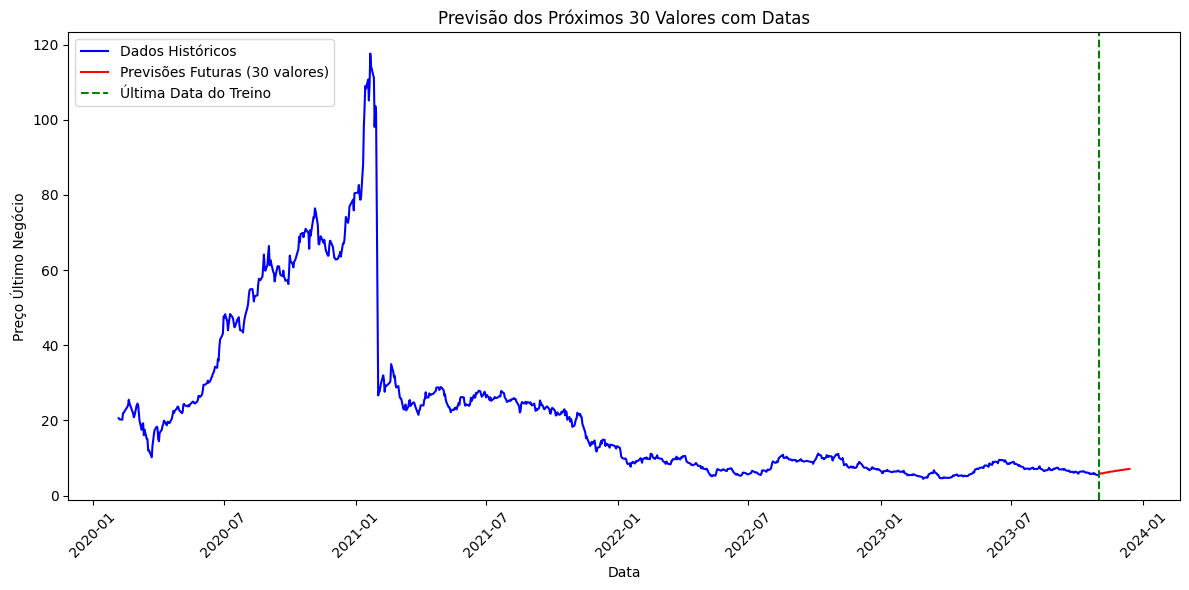

In [5]:
import matplotlib.pyplot as plt

last_sequence = train_data_values[-sequence_length:]  # Última sequência de treino
future_predictions = []

current_sequence = last_sequence.reshape((1, sequence_length, 1))

for _ in range(30):  # Prever os próximos 30 valores
    next_prediction = model.predict(current_sequence)[0]
    future_predictions.append(next_prediction)

    # Atualizar a sequência atual para incluir a nova previsão
    current_sequence = np.append(current_sequence[:, 1:, :], [[next_prediction]], axis=1)

# Converter as previsões em um array unidimensional
future_predictions = np.array(future_predictions).flatten()

# Criar um DataFrame com as próximas 30 datas e os valores previstos
last_date = train_data.index[-1]  # Última data do conjunto de treino
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')  # Próximas 30 datas úteis

# Criar o DataFrame com as previsões e datas
future_df = pd.DataFrame({'Date': future_dates, 'LSTM Prediction': future_predictions})

# Plotar os dados históricos e as previsões futuras
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['preco_ultimo_negocio'], label='Dados Históricos', color='blue')
plt.plot(future_df['Date'], future_df['LSTM Prediction'], label='Previsões Futuras (30 valores)', color='red')
plt.title('Previsão dos Próximos 30 Valores com Datas')
plt.xlabel('Data')
plt.ylabel('Preço Último Negócio')
plt.axvline(x=last_date, color='green', linestyle='--', label='Última Data do Treino')  # Linha para a última data de treino
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()